# Digit Recognition with Artificial Neural Networks

<p>
<ol>
<li>Business Problem Understanding</li>
<li>Data Understanding</li>
<li>Data Preparation</li>
<li>Modeling</li>
<li>Evaluation</li>
</ol>
</p>

# Business Problem Understanding

<p>The problem To correctly recognize and classify handwritten digits.</p>

![mnist](https://storage.googleapis.com/khanhlvg-public.appspot.com/digit-classifier/mnist.png)

# Data Understanding

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# Loading the Mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training Set Size: ", X_train.shape, y_train.shape)
print("Test Set Size: ", X_test.shape, y_test.shape)

Training Set Size:  (60000, 28, 28) (60000,)
Test Set Size:  (10000, 28, 28) (10000,)


In [3]:
# Number of classes
num_labels = len(np.unique(y_train))
num_labels

10

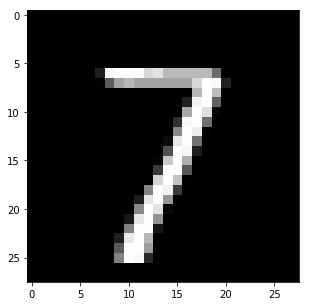

In [4]:
# Showing Examples from the Data Set
plt.figure(figsize=(5,5))
plt.imshow(X_train[560], cmap="gray")

In [6]:
def visualize_img(data, num=10):
  plt.figure(figsize=(5, 5))
  for i in range(0, num):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(data[i], cmap="gray")
    plt.axis("off")

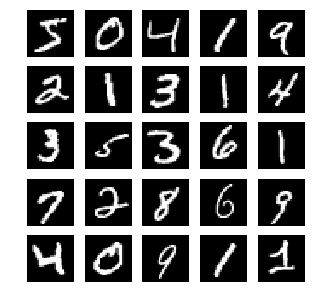

In [17]:
visualize_img(X_train,25)

In [8]:
# The process of translating the image into a computer-understandable form

print(X_train[3])

# The value of the 3rd image in the data set in row 10 and column 10
print(X_train[2][10,10])

# The value of the 3rd image in the data set in row 15 and column 5
print(X_train[2][15,5])

# Average of the pixel values of the 3rd image in the data set
print(X_train[2].mean())

# Sum of pixel values of the 3rd image in the data set
print(X_train[2].sum())

# Values of the 3rd image in the dataset between rows 14 and 20 and columns 10 and 20
print(X_train[2][14:20, 10:20])

# Average of the values between rows 14 and 20 and columns 10 and 20 of the 3rd image in the data set
print(X_train[2][14:20, 10:20].mean())

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96
  244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127
  251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [9]:
def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap="gray")
  width, height = img.shape

  threshold = img.max() / 2.5

  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y], 2)), xy=(y,x), 
                  color="white" if img[x][y] < threshold else "black")

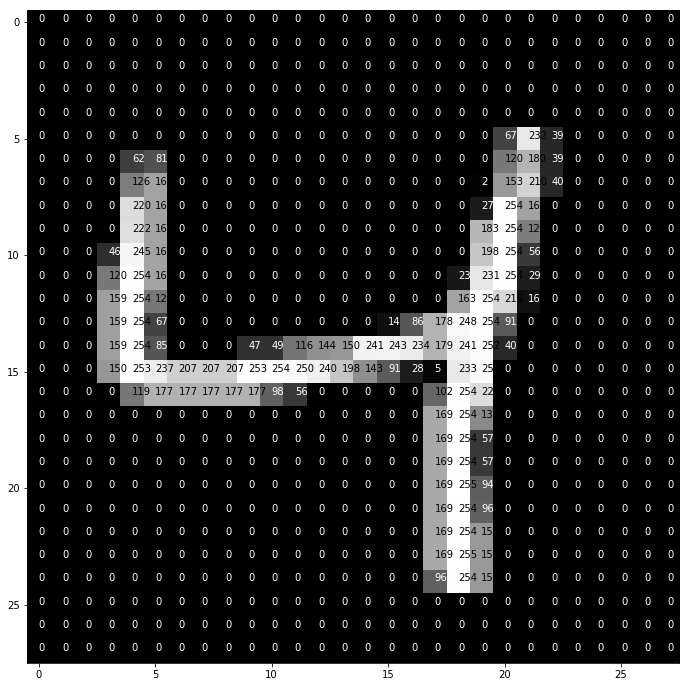

In [10]:
pixel_visualize(X_train[2])

# Data Preparation

## Encoding for Dependent Variable

In [11]:
# Before encoding
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
# How classes are expressed after encoding (one-hot encoding)

y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## Reshaping

<p>In deep learning problems, reshaping is done to adapt the data to the requirements of the model and to make data processing more efficient. The number of channels is determined according to the color information of the image and the requirements of the model.

Why is reshaping done?
<ol>
<li><strong>Model Input Matching:</strong> Models expect data of a certain size and shape. In particular, convolutional neural networks (CNNs) receive images of specific sizes as input. Reshaping ensures that the data conforms to the input dimensions and format expected by the model.</li>

<li><strong>Batch Processing:</strong> Deep learning models process data in batches. Therefore, the data must be in a certain format. For example, all images in a batch must have the same size and shape.</li>
    
<li><strong>Data Normalization:</strong> Reshaping is also used when normalizing data and bringing it into a specific range (e.g., 0-1 range).</li>
<li><strong>Memory and Computational Efficiency</strong></li>
<li><strong>Improving Model Training and Performance</strong></li>
</ol>

What Determines the Number of Channels?
<ol>
    <li><strong>By Image Type:</strong></li>
    <ul>
        <li><strong>Black and White (Grayscale) Images:</strong> These images contain a single channel because each pixel has only one intensity or brightness value. For example, images from the MNIST dataset.
            Reshaping: (height, width, 1).</li>
        <li><strong>Color Images:</strong> Color images usually have three channels (RGB). Each pixel has red, green and blue components.
            Reshaping: (height, width, 3).</li>
    </ul>
    <li><strong>According to Model Requirements:</strong></li>
    <ul>
        <li>Some specific models or data processing techniques may require a different number of channels. For example, different spectral bands may be used in medical image processing or remote sensing applications, in which case the number of channels may vary depending on the type of data.</li>
    </ul>
</ol>
</p>

In [18]:
image_size = X_train.shape[1]
image_size

28

In [63]:
print(f"X_train size: {X_train.shape}\n\nX_test size: {X_test.shape}")

X_train size: (60000, 28, 28)

X_test size: (10000, 28, 28)


In [19]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) # Here, 1 indicates the number of channels. Since the images in the dataset we are working with are in black and white, we specified the number of channels as 1 here.
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1) # Here, 1 indicates the number of channels. Since the images in the dataset we are working with are in black and white, we specified the number of channels as 1 here.

In [20]:
print(f"X_train size: {X_train.shape}\n\nX_test size: {X_test.shape}")

X_train size: (60000, 28, 28, 1)

X_test size: (10000, 28, 28, 1)


## Standardization

<p>In deep learning problems, standardization (normalization) is a critical step to make the model learn more efficiently and faster, increase computational stability and improve overall performance.

Reasons and benefits of standardization:
<ol>
    <li><strong>Faster and Stable Training:</strong></li>
    <ul>
        <li><strong>Increasing Learning Speed:</strong> Standardized data allows optimization algorithms to run faster and more efficiently. When data is in the same scaled range, weight updates are more balanced and the model converges faster.</li>
        <li><strong>Computational Stability:</strong> Large or small scale data values can cause the weights to be updated too large or small, which negatively affects the stability of the model. Standardization reduces this problem.</li>
    </ul>
            <li><strong>Enhancing the Effect of Gradient Descent:</strong></li>
    <ul>
        <li><strong>Balancing Gradients:</strong> Standardized data balances the gradients of different features, making the learning process more stable. This allows the model to learn in a more balanced way and perform better overall.</li>
    </ul>
        <li><strong>Mitigating the Risks of Overfitting and Underfitting:</strong></li>
    <ul>
        <li>Increasing the Ability to Generalize</li>
        <li>Better Regularization</li>
    </ul>
            <li><strong>Equalization of Attributes:</strong></li>
    <ul>
        <li><strong>Same Weighting of Attributes:</strong> Having the data in the same scaled range ensures that the model treats all attributes equally. Attributes at different scales can cause the model to give more importance to some attributes, leading to unbalanced learning.</li>
    </ul>
        <li><strong>Numerical Stability:</strong></li>
    <ul><li><strong>Numerical Stability:</strong> Standardized data increases numerical stability, reducing computational errors that can be caused by extremely large or small numbers.</li></ul>
    
</ol>
</p>

In [66]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

### Neuron
Think of a **neuron** as a small unit or a decision-maker in a neural network. In the brain, neurons receive signals from other neurons, process them, and decide whether to pass the signal forward. Similarly, in a neural network, a neuron receives inputs, processes them, and produces an output.

#### Example:
Imagine you're deciding whether to go to the gym. Your inputs could be:
- How tired you are (Input 1)
- How much free time you have (Input 2)
- Whether it's raining outside (Input 3)

Each of these inputs influences your decision. A neuron in a neural network does something similar: it takes inputs, processes them using weights and biases, and then makes a decision (i.e., gives an output).

### Weight
The **weight** determines how important an input is to the neuron’s decision. In simple terms, a weight adjusts the influence of each input.

#### Example:
- If you’re not that tired, the weight for the "tired" input might be low (meaning this input won't affect your decision much).
- If having free time is very important for your decision, the weight for the "free time" input will be high.

Mathematically, each input is multiplied by its corresponding weight before being passed to the neuron.

### Bias
The **bias** allows the neuron to shift the decision threshold, meaning it adjusts the overall output independently of the inputs.

#### Example:
Let’s say you always go to the gym unless it’s a stormy day. This tendency can be represented by a bias, making the neuron more likely to output "go to the gym" unless certain conditions (like the weather) drastically change the decision.

Mathematically, the bias is added to the weighted sum of inputs, allowing the model to fit the data better.

### Mathematical Formulation
If you have inputs \(x_1, x_2, x_3\) and weights \(w_1, w_2, w_3\), and a bias \(b\), the neuron's output (before activation) can be calculated as:


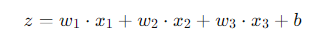


### Activation Function
After calculating \(z\), the neuron applies an **activation function** to produce the final output. The purpose of the activation function is to introduce non-linearity, meaning the model can learn more complex patterns.

#### Example:
If you're trying to predict whether to go to the gym, the activation function might take the combined inputs and weights, and give you a probability (between 0 and 1) of whether you'll go.

### Common Activation Functions

1. **Sigmoid Activation Function**: This function gives an output between 0 and 1, making it useful for binary decisions. Mathematically:

   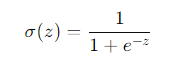

   For large positive \(z\), the output approaches 1. For large negative \(z\), it approaches 0. 

2. **ReLU (Rectified Linear Unit)**: It outputs the input directly if it's positive, or 0 if it's negative:


   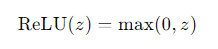


   ReLU is very popular because it helps the model learn efficiently by avoiding some issues with the sigmoid function, like vanishing gradients.

#### Why Activation Functions Matter
Without an activation function, the neural network would just be a linear combination of inputs, weights, and bias, which is limited in its capacity to learn complex patterns. By introducing non-linearity, the activation function allows the network to make sophisticated decisions.

---

### Summary
- **Neuron**: Processes inputs and generates an output.
- **Weight**: Determines how much influence each input has.
- **Bias**: Shifts the decision-making threshold.
- **Activation Function**: Adds non-linearity, helping the model learn complex patterns.

# Modeling

## Defining Neural Network Architecture

In [67]:
model = tf.keras.Sequential([
    Flatten(input_shape=(28, 28, 1)), # Making the data understandable to the neural network
    Dense(units=128, activation="relu", name="layer1"), # Hidden layer
    Dense(units=num_labels, activation="softmax", name="output_layer")])  # Output Layer

model.compile(loss="categorical_crossentropy", # Error evaluation metric, the objective is to minimize this function
              optimizer="adam", # Optimization algorithm to minimize the loss function
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"]) # Evaluation metrics

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
layer1 (Dense)               (None, 128)               100480    
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [70]:
# Model fit
model.fit(X_train, y_train, epochs=8, batch_size=128, 
          validation_data=(X_test, y_test))

Epoch 1/8
469/469 [==============================] - 4s 6ms/step - loss: 0.3518 - precision_1: 0.9478 - recall_1: 0.8525 - accuracy: 0.9038 - val_loss: 0.1933 - val_precision_1: 0.9567 - val_recall_1: 0.9312 - val_accuracy: 0.9443
Epoch 2/8
469/469 [==============================] - 2s 4ms/step - loss: 0.1599 - precision_1: 0.9653 - recall_1: 0.9445 - accuracy: 0.9545 - val_loss: 0.1317 - val_precision_1: 0.9695 - val_recall_1: 0.9547 - val_accuracy: 0.9613
Epoch 3/8
469/469 [==============================] - 2s 4ms/step - loss: 0.1147 - precision_1: 0.9740 - recall_1: 0.9606 - accuracy: 0.9669 - val_loss: 0.1114 - val_precision_1: 0.9724 - val_recall_1: 0.9617 - val_accuracy: 0.9670
Epoch 4/8
469/469 [==============================] - 2s 5ms/step - loss: 0.0895 - precision_1: 0.9793 - recall_1: 0.9698 - accuracy: 0.9744 - val_loss: 0.0965 - val_precision_1: 0.9760 - val_recall_1: 0.9670 - val_accuracy: 0.9704
Epoch 5/8
469/469 [==============================] - 3s 7ms/step - loss: 0.0

## Model Evaluation

In [71]:
history = model.fit(X_train, # Dependent Variable
                    y_train, # Independent Variable
                    epochs=8, # Number of iterations
                    batch_size=128, # Number of neurons to be optimized
                    validation_data=(X_test, y_test)) # Test data set

Epoch 1/8
469/469 [==============================] - 2s 5ms/step - loss: 0.0351 - precision_1: 0.9919 - recall_1: 0.9887 - accuracy: 0.9901 - val_loss: 0.0674 - val_precision_1: 0.9813 - val_recall_1: 0.9770 - val_accuracy: 0.9788
Epoch 2/8
469/469 [==============================] - 2s 5ms/step - loss: 0.0296 - precision_1: 0.9931 - recall_1: 0.9903 - accuracy: 0.9918 - val_loss: 0.0709 - val_precision_1: 0.9807 - val_recall_1: 0.9766 - val_accuracy: 0.9785
Epoch 3/8
469/469 [==============================] - 2s 5ms/step - loss: 0.0251 - precision_1: 0.9943 - recall_1: 0.9922 - accuracy: 0.9932 - val_loss: 0.0713 - val_precision_1: 0.9792 - val_recall_1: 0.9751 - val_accuracy: 0.9770
Epoch 4/8
469/469 [==============================] - 2s 5ms/step - loss: 0.0211 - precision_1: 0.9955 - recall_1: 0.9937 - accuracy: 0.9947 - val_loss: 0.0654 - val_precision_1: 0.9818 - val_recall_1: 0.9785 - val_accuracy: 0.9801
Epoch 5/8
469/469 [==============================] - 2s 5ms/step - loss: 0.0

Text(0.5, 1.0, 'Training and Test Loss Graph')

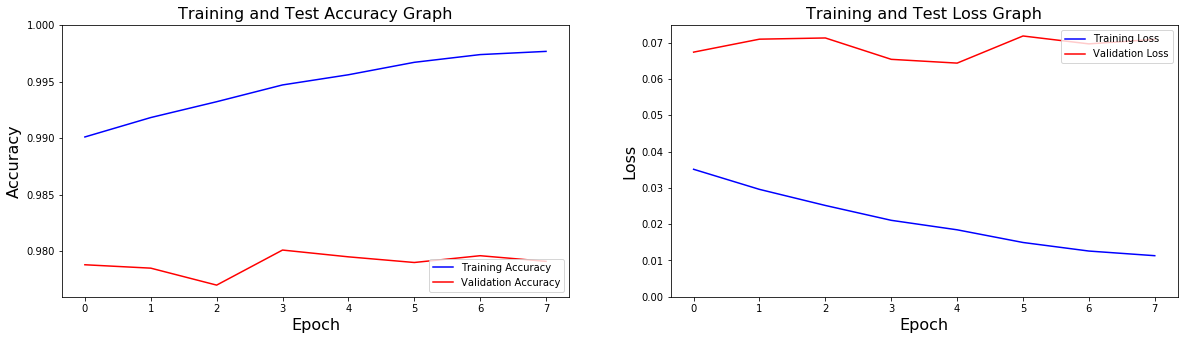

In [72]:
# Accuracy and Loss Charts
# Accuracy
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], color="b", 
         label="Training Accuracy")
plt.plot(history.history["val_accuracy"], color="r", 
         label="Validation Accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Accuracy", fontsize=16)
plt.ylim([min(plt.ylim()), 1])
plt.title("Training and Test Accuracy Graph", fontsize=16)
# Loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"], color="b", label="Training Loss")
plt.plot(history.history["val_loss"], color="r", 
         label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.ylim([0, max(plt.ylim())])
plt.title("Training and Test Loss Graph", fontsize=16)

In [73]:
loss, precision, recall, acc = model.evaluate(X_test, y_test, 
                                              verbose=False)
print(f"Test Accuracy: {round(acc * 100, 2)}")
print(f"Test Loss: {round(loss * 100, 2)}")
print(f"Test Precision: {round(precision * 100, 2)}")
print(f"Test Recall: {round(recall * 100, 2)}")

Test Accuracy: 97.91
Test Loss: 7.09
Test Precision: 98.1
Test Recall: 97.82


## Prediction and Visualization

In [74]:
y_pred = model.predict(X_test)

In [75]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [76]:
if len(y_test.shape) > 1 and y_test.shape[1] != 1:
    y_test = np.argmax(y_test, axis=1)
    
#Bu kod parçası, y_test değişkeninin çok boyutlu olup olmadığını kontrol eder ve gerekiyorsa onu tek boyutlu bir hale getirir. Özellikle, eğer y_test bir "one-hot encoded" formda ise, yani her sınıf için ayrı bir sütun içeriyorsa, onu sınıf indekslerini içeren tek boyutlu bir array'e dönüştürür.

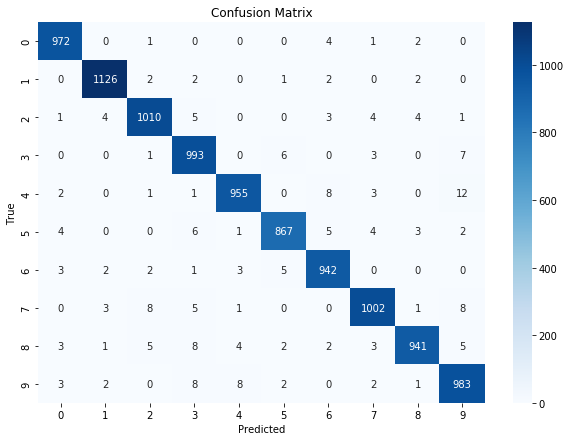

In [77]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Registering the Model and Predicting a Randomly Selected Image from the Data Set

In [78]:
model.save("mnist_model.h5")

In [88]:
import random
random = random.randint(0, X_test.shape[0])
print(y_test[random])
test_image = X_test[random]
print(y_test[random])

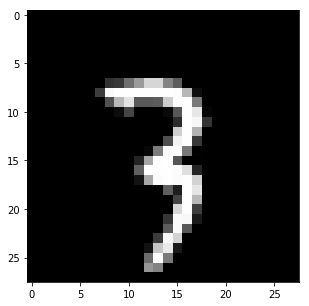

In [92]:
plt.figure(figsize=(5,5))
plt.imshow(test_image.reshape(28, 28), cmap="gray")

In [93]:
test_data = X_test[random].reshape(1, 28, 28, 1)

In [94]:
probability = model.predict(test_data)

In [95]:
predicted_classes = np.argmax(probability)

In [96]:
print(f"Predicted Class: {predicted_classes}\nProbability 
      Value of Predicted Class: {np.max(probability, 
            axis = -1)[0]}\nProbability Values of Other 
      Classes: {probability}")

Predicted Class: 3
Probability Value of Predicted Class: 0.9264500737190247
Probability Values of Other Classes: [[1.2315905e-09 2.3895063e-06 1.0291400e-06 9.2645007e-01 9.3089003e-10
  1.4319881e-08 4.0393386e-13 7.3508866e-02 4.6239916e-06 3.3000841e-05]]
